In [1]:
%load_ext autoreload
%autoreload 2

In [66]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import time

import swendsen_wang as sw
import log

In [69]:
Lx = Ly = Lz = 10
T = 0.1

spin_config, bond_indices, N = sw.init_system(Lx, Ly, Lz)
spin_config = sw.swendsen_wang_update(spin_config, bond_indices, T=T)

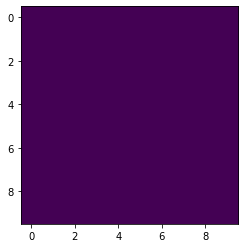

In [63]:
plt.imshow(spin_config.reshape(Lx, Ly, Lz)[:, :, 9])

  0%|          | 0/4 [00:00<?, ?it/s]

calculate L = 4
   took 28.4 seconds


 25%|██▌       | 1/4 [00:28<01:25, 28.44s/it]

calculate L = 8
   took 35.7 seconds


 50%|█████     | 2/4 [01:04<01:05, 32.69s/it]

calculate L = 16
   took 70.5 seconds


 75%|███████▌  | 3/4 [02:14<00:49, 49.96s/it]

calculate L = 32
   took 362.0 seconds


100%|██████████| 4/4 [08:16<00:00, 124.16s/it]

done


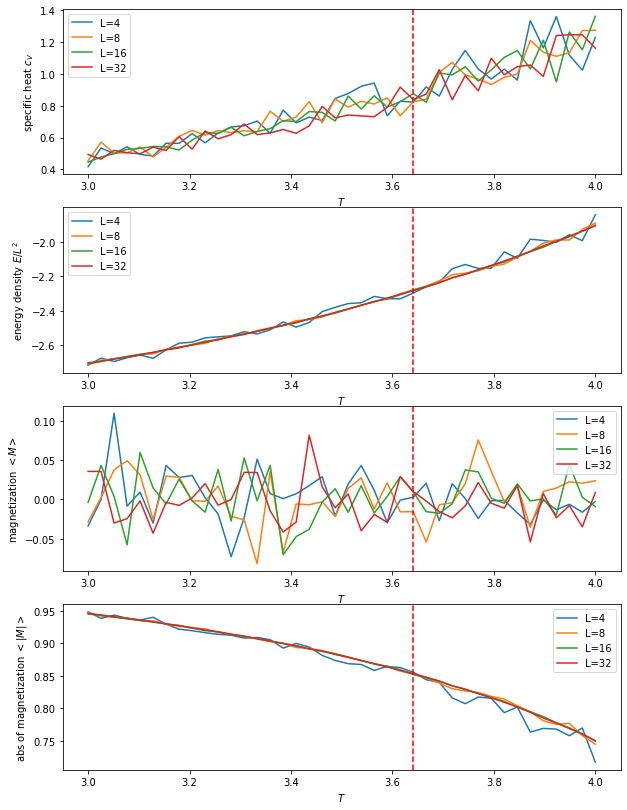

In [71]:
fig, axes = plt.subplots(4, 1, figsize=(10, 14))
ax1, ax2, ax3, ax4 = axes
Tc = 3.64
Ts = np.linspace(3, 4, 40)

print("warning: this takes some time")
for L in tqdm([4, 8, 16, 32]):
    print("calculate L =", L, flush=True)
    t0 = time.time()
    Es, Cs, Ms, absMs = sw.run(Ts, L, N_measure=1000)
    # Plot the results
    ax1.plot(Ts, Cs, label='L={L:d}'.format(L=L))
    ax2.plot(Ts, Es, label='L={L:d}'.format(L=L))
    ax3.plot(Ts, Ms, label='L={L:d}'.format(L=L))
    ax4.plot(Ts, absMs, label='L={L:d}'.format(L=L))
    print("   took {t:.1f} seconds".format(t=time.time()-t0), flush=True)


for ax in axes:
    ax.axvline(Tc, color='r', linestyle='--')
    ax.set_xlabel('$T$')
    ax.legend(loc='best')

ax1.set_ylabel('specific heat $c_V$')
ax2.set_ylabel('energy density $E/L^2$')
ax3.set_ylabel('magnetization $<M>$')
ax4.set_ylabel('abs of magnetization $<|M|>$')
print("done")